In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import *
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
bd = 64

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [5]:
path = untar_data(URLs.MNIST_SAMPLE); path

WindowsPath('C:/Users/COI-AI-17/.fastai/data/mnist_sample')

In [7]:
tfms= get_transforms(do_flip= False)
data = ImageDataBunch.from_folder(path, ds_tfms =tfms, size =26)

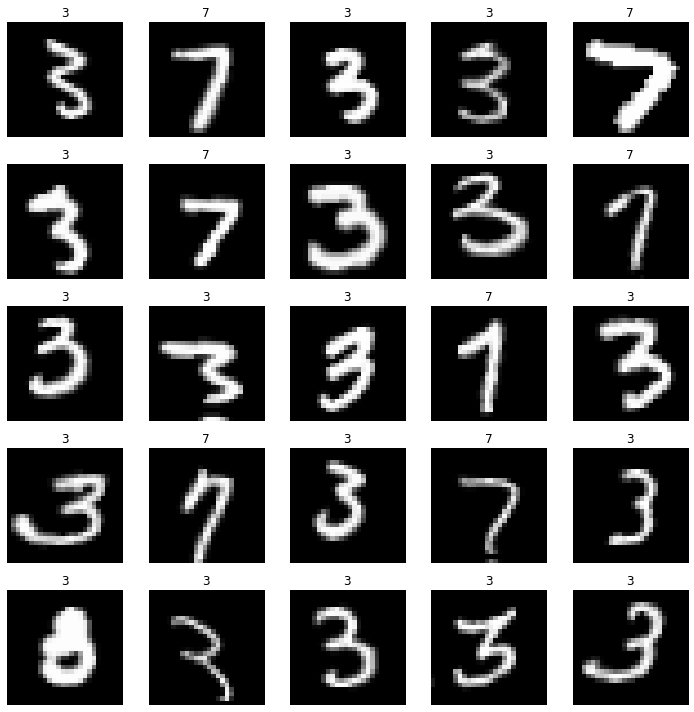

In [14]:
data.show_batch(rows=5, figsize=(10,10))
#data =show_image(rows=4, figsize=(6,6))

In [15]:
learn= cnn_learner(data, models.resnet18, metrics =accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\COI-AI-17/.cache\torch\checkpoints\resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.190862,0.091686,0.965162,02:09
1,0.125337,0.054853,0.982336,02:08


In [19]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [21]:
data = ImageDataBunch.from_df(path, df, ds_tfms= tfms, size =24)

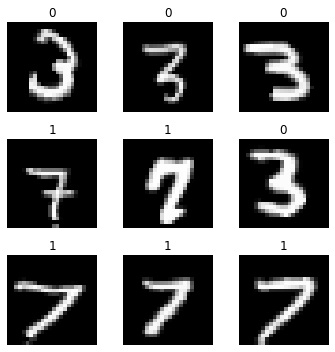

In [23]:
data.show_batch(rows =3, figsize =(5,5))

In [24]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [26]:
fn_paths = [path/name for name in df['name']]
fn_paths[:2]

[WindowsPath('C:/Users/COI-AI-17/.fastai/data/mnist_sample/train/3/7463.png'),
 WindowsPath('C:/Users/COI-AI-17/.fastai/data/mnist_sample/train/3/21102.png')]

In [32]:
pat = r"/(\d)/\d+\.png$"
pat = ImageDataBunch.from_name_re(path, fn_paths, pat =pat,ds_tfms= tfms, size =24)
data.classes

[0, 1]

In [35]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
                                     label_func =lambda x: '3' if '/3/' in str(x) else'7')
data.classes

['7']

In [36]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['7', '7', '7', '7', '7']

In [37]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['7']